# Competição Kaggle - Titanic 

O naufrágio do Titanic é um dos mais famosos em toda a história, no dia 15 de abril de 1912, durante a sua viagem, o então considerado "inafundável" navio RMS Titanic afundou depois de colidir com um iceberg. Infelizmente não haviam coletes salva-vidas para todo mundo a bordo, o que resultou na morte de 1502 em um total de 2224 passageiros.

Enquanto existiu alguma sorte para os que conseguiram sobreviver, parece que alguns dos grupos de pessoas tiveram mais chance de sobreviver do que outros, e nessa competição, é pedido que desenvolva um modelo preditivo capaz de responder a seguinte pergunta: "Quais tipos de pessoas tinha a maior chance de sobreviver?"

O desafio é o seguinte: usar machine learning para criar um modelo para prever quais passageiros sobreviveriam ao naufrágio do Titanic

O arquivo de submissão deve conter o PassengerId e uma coluna booleana Survived, e deverá ter exatamente 418 registros.

Dicionário de variáveis: 
Survival -> se o passageiro sobreviveu (0 = Não, 1 = Sim)  <br>
pclass -> classe do ticket  <br>
sibsp -> número de irmãos/cônjuges a bordo do navio <br>
parch -> número de pais/filhos a bordo do navio<br>
ticket -> número do ticket <br>
fare -> preço da passagem <br>
cabin -> número da cabine <br>
embarked -> porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)<br>

In [87]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

#Técnica de dimensionalidade 
from sklearn.decomposition import PCA

#Biblioteca de normalização
from sklearn.preprocessing import StandardScaler

#Biblioteca de clusterização
from sklearn.cluster import KMeans, MeanShift

#Quantas familias tinham a bordo?
#Quantas familias sobreviveram?

#Padronizar o tema visual para os gráficos do seaborn realizados 
sns.set_theme(palette='Set2')

In [36]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

df_train.drop(columns=['PassengerId'], inplace=True)
df_test.drop(columns=['PassengerId'], inplace=True)

display(df_train)
display(df_test)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
#Quantas familias tinham a bordo? 
#df_train['Ticket'].value_counts() > 1
#df_train[df_train['Ticket'] == '347082']

#Pra verificar o número de familias, basta verificar o sobrenome
#Verificar o número do ticket não funciona porque podem ser de familias diferentes no mesmo lugar

df_train['Sobrenome'] = df_train['Name'].apply(lambda x: x.split(',')[0])
#Pessoas de familias diferentes podem ter o mesmo sobrenome também, então temos que pegar o ticket igual
#df_train.Sobrenome.value_counts()

#df_train.groupby('Sobrenome')['Ticket']

#Existem 148 cabines diferentes ocupadas no navio, sendo muitas variáveis para criar uma coluna numérica para cada uma, 
#então vou pegar apenas a primeira letra da cabine
#len(df_train.Cabin.unique())

148

In [ ]:
#Podemos somar as colunas de irmãos e pais a bordo para ver o tamanho da familia 
df_train['Tamanho_Familia'] = df_train['SibSp'] + df_train['Parch']
df_train.Tamanho_Familia.value_counts()

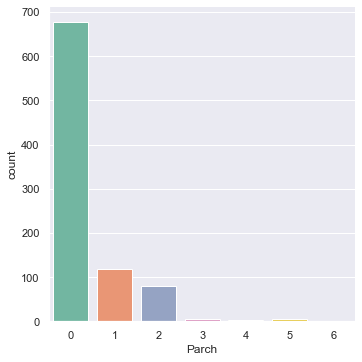

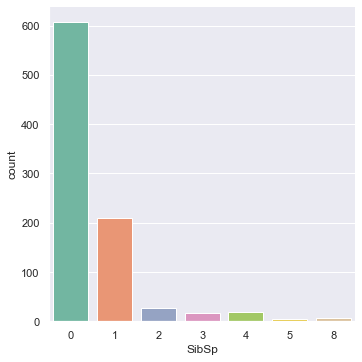

In [88]:
#Verificando visualmente a quantidade de pessoas com familiares ou acompanhantes no navio
sns.catplot(x='Parch', kind='count', data=df_train)
sns.catplot(x='SibSp', kind='count', data=df_train)

### Ambos os dataframes de teste e treino possuem as mesmas colunas com valores nulos: Age, Fare e Cabin, porém o dataframe de teste possui a coluna Embarked com alguns valores nulos também

In [18]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 n

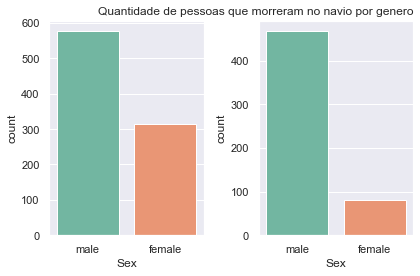

In [75]:
#Quantidade de homens e mulheres no navio vs homens e mulheres que morreram 
fig, ax = plt.subplots(1,2)
plt.title('Quantidade de pessoas que morreram no navio por genero', loc='right', fontsize=12)

sns.countplot(x='Sex', data=df_train, ax=ax[0])
sns.countplot(x='Sex', data=df_train[df_train['Survived'] == 0], ax=ax[1])

plt.tight_layout()

## Preparando os dados para a criação do modelo de Machine Learning

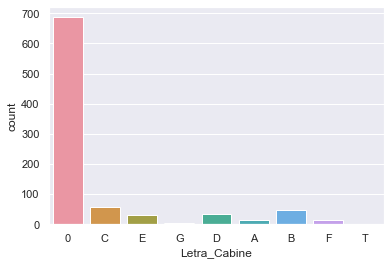

In [76]:
##Existem 148 cabines diferentes ocupadas no navio, sendo muitas variáveis para criar uma coluna numérica para cada uma, 
#então vou pegar apenas a primeira letra da cabine
#len(df_train.Cabin.unique())
df_train['Letra_Cabine'] = df_train['Cabin'].str[:1]
df_train['Letra_Cabine'] = df_train['Letra_Cabine'].fillna(0)
df_test['Letra_Cabine'] = df_test['Cabin'].str[:1]
df_test['Letra_Cabine'] = df_test['Letra_Cabine'].fillna(0)

sns.countplot(x='Letra_Cabine', data=df_train)

#Transformado as colunas categóricas em numéricas com o get_dummies
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Letra_Cabine'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'Letra_Cabine'])

#Substituir os valores nulos das idades pela média das próprias colunas
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df_train.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

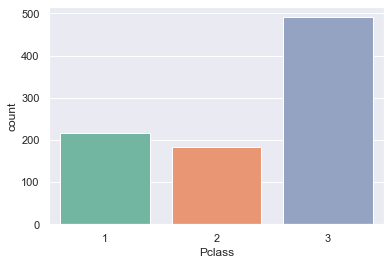

In [77]:
sns.countplot(x='Pclass', data=df_train)

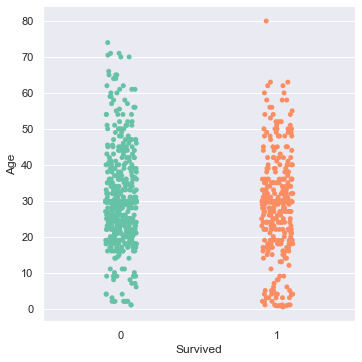

In [78]:
sns.catplot(data=df_train, x='Survived', y='Age')

In [45]:
#Cópia do dataframe para realizar o PCA 
df_auxiliar = df_train.copy()
df_auxiliar2 = df_train.copy()

df_auxiliar.drop(columns=['Letra_Cabine'], inplace=True)
df_auxiliar2.drop(columns=['Letra_Cabine'], inplace=True)

model = PCA(n_components=2)
X = model.fit_transform(df_auxiliar)
X_df = pd.DataFrame(X)
X_df.columns = ['X', 'Y']

sns.scatterplot(data=X_df, x='X', y='Y')

KeyError: "['Letra_Cabine'] not found in axis"

In [ ]:
#Método de clusterização KMeans utilizando o Elbow Method 
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_auxiliar)

alvo = df_auxiliar 

max = 10
km_scores = []
km_silhouette = []
vmeasure_score = []
db_score = []
gm_bic = []
gm_score = []

for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))

In [ ]:
plt.figure(figsize=(8,6))
plt,title('Elbow Method', fontsize=16)
plt.scatter(x=[i for i in range(2,max)], y=km_scores, edgecolor='k')
plt.grid(True)=
plt.xlabel('Número de clusteres', fontsize=14)
plt.ylabel('K-Means score', fontsize=14)
plt.xticks([i for i in range(2,max)], fontsize=14)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
#Teste de modelagem com o número de K = 5
clt_kmean = KMeans(n_clusters=5)
clt_kmean.fit(df_auxiliar)
labels = clt_kmean.predict(df_auxiliar)
df_auxiliar['Cluster'] = labels
display(df_auxiliar)

In [ ]:
#Plotagem do gráfico para ver a diferença visual entre o número de clusters 
plt.figure(figsize=(15,15))

#Aplicar o KMeans no dataframe 
for i in range(2,6):
    kmean = KMeans(n_clusters=i)
    kmean_list = kmean.fit_predict(df_auxiliar)
    X_df['KMean_' + str(i)] = kmean_list
    plt.subplot(3,3,i-1)
    sns.scatterplot(data=X_df, x='X', y='Y', hue='KMean_'+str(i))

In [ ]:
#Método de clusterização MeanShift
clt_ms = MeanShift()
cls_ms.fit(df_auxiliar2)
labels_ms = clt_ms.predict(df_auxiliar2)
df_auxiliar2['Cluster'] = labels_ms

In [ ]:
df_auxiliar2['Cluster'].value_counts()

In [ ]:
#Plotagem do gráfico do MeanShift com 5 clusters
analyzer = MeanShift(n_jobs=-1)
analyzer.fit(df_auxiliar2)
labels_ms = analyzer.labels_
print(np.unique(labels_ms))

X_df['MShift'] = labels_ms
display(X_df.head())

sns.scatterplot(data=X_df, x='X', y='Y', hue='MShift')